In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
#import warnings
#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

d:\program files\python\python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# Data Exploration

In [2]:
df = pd.read_excel('capstone_dataset.xlsx')
print(len(df))
df.head()

728


,State,Code,District,Headquarters,Population(2011),Area(km2),Density(/km2),Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20,7.000000,93.000000
1,Andaman and Nicobar,NaN,North and Middle Andaman,Mayabunder,105597,3736.0,28,12.611239,92.831654
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89,10.705690,92.487468
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213,14.654623,77.556260
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275,13.160105,79.155551


In [3]:
df = df.rename(columns={'Population(2011)': 'Population', 'Area(km2)': 'Area', 'Density(/km2)': 'Density'})
df.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20,7.000000,93.000000
1,Andaman and Nicobar,NaN,North and Middle Andaman,Mayabunder,105597,3736.0,28,12.611239,92.831654
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89,10.705690,92.487468
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213,14.654623,77.556260
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275,13.160105,79.155551


In [4]:
#drop the rows with missing values in any columns
df.replace('NaN', np.nan, inplace=True)
df = df.dropna()
print(len(df))
df.head()

719


,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20,7.000000,93.000000
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89,10.705690,92.487468
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213,14.654623,77.556260
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275,13.160105,79.155551
5,Andhra Pradesh,EG,East Godavari,Kakinada,5151549,10807.0,477,17.233496,81.722599


In [5]:
#to check if all NaN values are removed from dataset

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [State, Code, District, Headquarters, Population, Area, Density, Latitude, Longitude]
Index: []


In [6]:
df_state_pop_area_dens = df[['State', 'Population', 'Area']]
df_state_pop_area_dens.head()

,State,Population,Area
0,Andaman and Nicobar,36842,1841.0
2,Andaman and Nicobar,238142,2672.0
3,Andhra Pradesh,4083315,19130.0
4,Andhra Pradesh,4170468,15152.0
5,Andhra Pradesh,5151549,10807.0


In [7]:
df_state = df_state_pop_area_dens.groupby(['State'], as_index=False).sum()
print(len(df_state))
df_state.head(36)

36


,State,Population,Area
0,Andaman and Nicobar,274984,4513.00
1,Andhra Pradesh,49378776,160205.00
2,Arunachal Pradesh,1464867,81257.00
3,Assam,32804501,85776.00
4,Bihar,106329194,98097.00
5,Chandigarh,1055450,114.00
6,Chattisgarh,30803050,160230.00
7,Daman and Diu,586956,602.00
8,Delhi,16787941,1485.00
9,Goa,1457723,3702.00


In [8]:
state = df_state.columns
state

Index(['State', 'Population', 'Area'], dtype='object')

# Data Analysis

<BarContainer object of 36 artists>

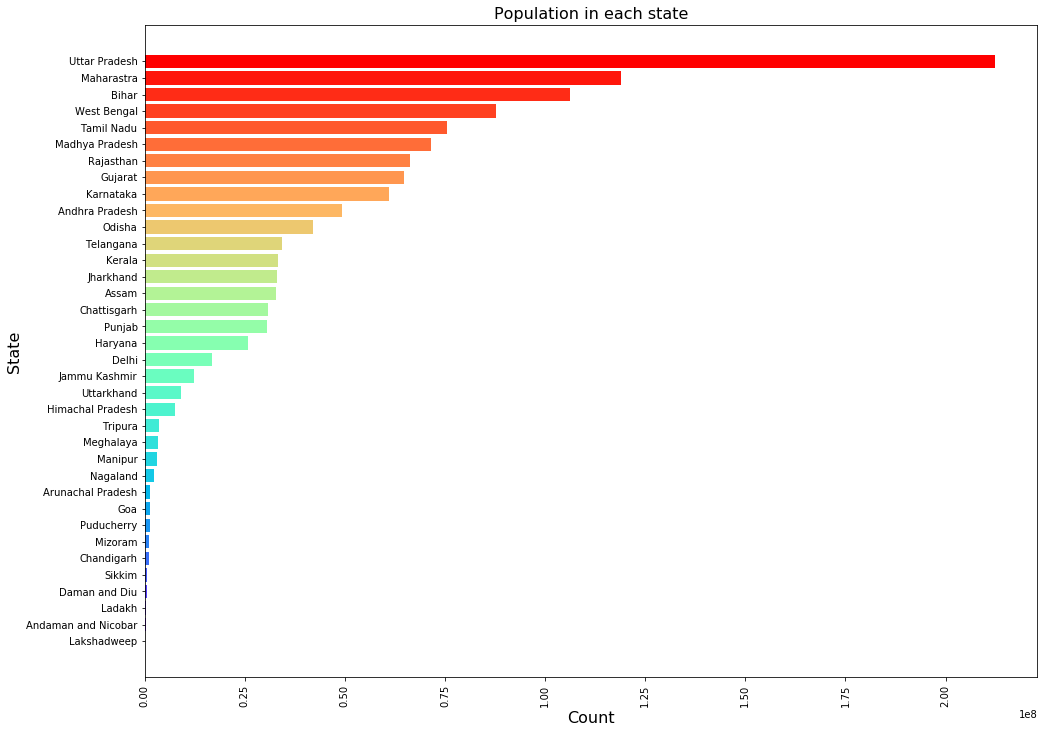

In [9]:
df_state.sort_values('Population',inplace=True)
population = df_state['Population']
state = df_state['State']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.title("Population in each state", fontsize = 16)
plt.barh(state, population.values, color = colors)

In [10]:
print('The data has {} states'.format(len(df['State'].unique())))

The data has 36 states


In [11]:
print('The states are - ' + str(list(df['State'].unique())))

The states are - ['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharastra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarkhand', 'West Bengal']


#### Enter the state of your choice

In [12]:
state = input('Enter a State - ')

Enter a State - Karnataka


#### Obtain latitude and longitude of the given state

In [13]:
geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Karnataka are 14.5203896, 75.7223521.


#### Create a map of State with districts superimposed on top

In [14]:
#dataframe containing only the state which is input by the user
df_user_state = df[df['State']==state].reset_index(drop=True)
df_user_state.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Karnataka,BK,Bagalkot,Bagalkot,1890826,6583.0,288,16.185317,75.696792
1,Karnataka,BL,Ballari,Ballari,2532383,8439.0,300,15.248541,76.832365
2,Karnataka,BR,Bangalore Rural,Bangalore,987257,2239.0,441,13.001087,77.336123
3,Karnataka,BN,Bangalore Urban,Bangalore,9588910,2190.0,4378,12.945142,77.553645
4,Karnataka,BG,Belgaum,Belgaum,4778439,13415.0,356,15.857267,74.506934


In [15]:
#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

# Foursquare API 

#### Define Foursquare Credentials and Version

In [1]:
# @hidden_cell

CLIENT_ID = 'foursquareid' # your Foursquare ID
CLIENT_SECRET = 'foursquare secret' # your Foursquare Secret
VERSION = 'api version' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: foursquareid
CLIENT_SECRET:foursquare secret


#### We need to retrieve only tourist places. Let's check all the categories present in Foursquare API

In [17]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '5eb67aecbae9a2001b1d295b'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [18]:
#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		University
Event
		Christ

In [19]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


## Get the required Catgories 

In [20]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [22]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

#### Function to get the nearby venues of all the districts in the State

In [23]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [24]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Bagalkot
Ballari
Bangalore Rural
Bangalore Urban
Belgaum
Bidar
Chamarajnagar
Chikkaballapur
Chikkamagaluru
Chitradurga
Dakshina Kannada
Davanagere
Dharwad
Gadag
Gulbarga
Hassan
Haveri
Kodagu
Kolar
Koppal
Mandya
Mysuru
Raichur
Ramanagara
Shimoga
Tumakuru
Udupi
Uttara Kannada
Vijayapura
Yadgir


In [25]:
print(state_venues.shape)
state_venues

(90, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Bagalkot,16.185317,75.696792,Aihole,16.020952,75.881430,Historic Site
3,Bagalkot,16.185317,75.696792,Aihole Rock Cut Shiva Temple,16.021357,75.882536,Sculpture Garden
6,Bagalkot,16.185317,75.696792,Pattadakal - World Heritage Site,15.951226,75.816525,Historic Site
7,Bagalkot,16.185317,75.696792,Pattadakal Temple,15.950170,75.815833,Sculpture Garden
8,Bagalkot,16.185317,75.696792,Badami,15.923024,75.679630,Scenic Lookout
9,Ballari,15.248541,76.832365,Hampi,15.336226,76.460328,Historic Site
10,Ballari,15.248541,76.832365,Hanuman Temple,15.354657,76.469808,Historic Site
11,Ballari,15.248541,76.832365,Lotus Mahal,15.320533,76.470799,Scenic Lookout
16,Ballari,15.248541,76.832365,Martanga Hill,15.331547,76.468443,Mountain
23,Ballari,15.248541,76.832365,Vitthala temple,15.301051,76.460147,Historic Site


In [26]:
all_venues = state_venues['Venue'].tolist()
len(all_venues)

90

In [27]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Bagalkot,5
1,Ballari,7
2,Bangalore Rural,3
3,Bangalore Urban,3
4,Chamarajnagar,3
5,Chikkaballapur,7
6,Chikkamagaluru,7
7,Chitradurga,2
8,Dakshina Kannada,1
9,Dharwad,1


In [28]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

7

## Count number of venues retrieved in each District

<BarContainer object of 23 artists>

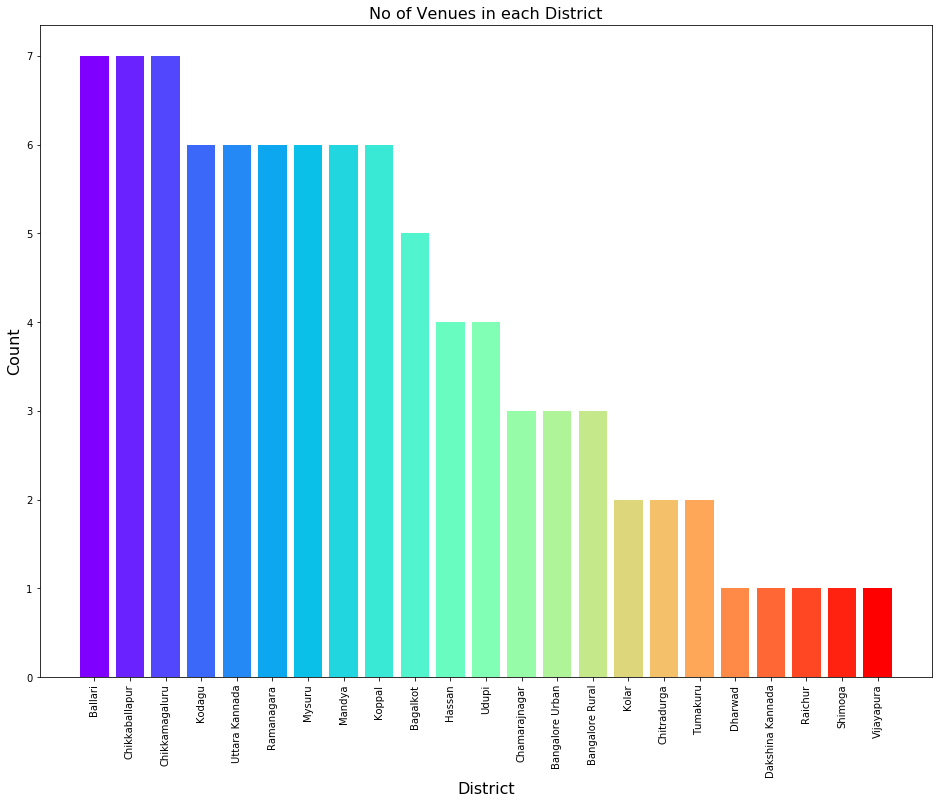

In [29]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

#### Unique categories curated from all the returned venues

In [30]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 24 uniques categories.


In [31]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Historic Site', 'Sculpture Garden', 'Scenic Lookout', 'Mountain',
       'Theme Park', 'Bowling Alley', 'Performing Arts Venue', 'Park',
       'Plaza', 'National Park', 'Garden', 'Other Great Outdoors',
       'Brewery', 'Music Venue', 'Farm', 'Trail', 'Castle', 'Campground',
       'Exhibit', 'Palace', 'Zoo', 'River', 'Island', 'Beach'],
      dtype=object)

## Analyze Each District

In [32]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Beach,Bowling Alley,Brewery,Campground,Castle,Exhibit,Farm,Garden,Historic Site,Island,Mountain,Music Venue,National Park,Other Great Outdoors,Palace,Park,Performing Arts Venue,Plaza,River,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Zoo
2,Bagalkot,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bagalkot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,Bagalkot,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Bagalkot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,Bagalkot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
state_venues_onehot.shape

(90, 25)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [34]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Beach,Bowling Alley,Brewery,Campground,Castle,Exhibit,Farm,Garden,Historic Site,Island,Mountain,Music Venue,National Park,Other Great Outdoors,Palace,Park,Performing Arts Venue,Plaza,River,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Zoo
0,Bagalkot,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.400000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.4,0.000000,0.000000,0.000000
1,Ballari,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.571429,0.00,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.000000
2,Bangalore Rural,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667,0.000000,0.000000
3,Bangalore Urban,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Chamarajnagar,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.00,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,Chikkaballapur,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.00,0.142857,0.142857,0.000000,0.142857,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,Chikkamagaluru,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.428571,0.00,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.142857,0.000000
7,Chitradurga,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000
8,Dakshina Kannada,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,Dharwad,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [35]:
state_venues_grouped.shape

(23, 25)

#### Print each District along with the top 5 most common venues

In [36]:
num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bagalkot----
                  venue  freq
0  Sculpture Garden      0.4 
1  Historic Site         0.4 
2  Scenic Lookout        0.2 
3  Beach                 0.0 
4  Other Great Outdoors  0.0 
5  Trail                 0.0 
6  Theme Park            0.0 


----Ballari----
                  venue  freq
0  Historic Site         0.57
1  Mountain              0.29
2  Scenic Lookout        0.14
3  Beach                 0.00
4  Other Great Outdoors  0.00
5  Trail                 0.00
6  Theme Park            0.00


----Bangalore Rural----
              venue  freq
0  Theme Park        0.67
1  Bowling Alley     0.33
2  Beach             0.00
3  Trail             0.00
4  Sculpture Garden  0.00
5  Scenic Lookout    0.00
6  River             0.00


----Bangalore Urban----
                   venue  freq
0  Plaza                  0.33
1  Performing Arts Venue  0.33
2  Park                   0.33
3  Beach                  0.00
4  Bowling Alley          0.00
5  Trail                  0.00
6  Theme

#### Put this into a pandas dataframe

In [37]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category
0,Bagalkot,Sculpture Garden,Historic Site,Scenic Lookout,Zoo,Mountain,Bowling Alley,Brewery
1,Ballari,Historic Site,Mountain,Scenic Lookout,Zoo,Bowling Alley,Brewery,Campground
2,Bangalore Rural,Theme Park,Bowling Alley,Zoo,Mountain,Brewery,Campground,Castle
3,Bangalore Urban,Plaza,Performing Arts Venue,Park,Zoo,Island,Bowling Alley,Brewery
4,Chamarajnagar,Mountain,Garden,National Park,Zoo,Bowling Alley,Brewery,Campground


In [39]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Bagalkot,Historic Site,"Aihole, Pattadakal - World Heritage Site"
1,Bagalkot,Scenic Lookout,Badami
2,Bagalkot,Sculpture Garden,"Aihole Rock Cut Shiva Temple, Pattadakal Temple"
3,Ballari,Historic Site,"Hampi, Hanuman Temple, Vitthala temple, Queens Bath"
4,Ballari,Mountain,"Martanga Hill, Hemakuta Hill"


In [40]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''
        

#### Most common venues according to venue category in each District

In [41]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [42]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Bagalkot,"Aihole Rock Cut Shiva Temple, Pattadakal Temple","Aihole, Pattadakal - World Heritage Site",Badami,,,,
1,Ballari,"Hampi, Hanuman Temple, Vitthala temple, Queens Bath","Martanga Hill, Hemakuta Hill",Lotus Mahal,,,,
2,Bangalore Rural,"Wonderla Amusement Park, Wonder La",PVR bluO,,,,,
3,Bangalore Urban,M.G Road Boulevard,Rangashankara,Cubbon Park,,,,
4,Chamarajnagar,Mudhumalai Forest,Rose Garden,Bandipur National Park,,,,
5,Chikkaballapur,Bhartiya City,The Druid Garden,Gangamma Circle,Richard's Park,Our Native Village,Nandi Hills,nandi hills
6,Chikkamagaluru,"Channakeshwara Temple, Hoysaleshwara Temple, Halebeedu","Mullainagiri, Shiradi Ghat",Mudigere,Mullayanagiri,,,
7,Chitradurga,Pune-bangalore Highway,Chitradurga Fort,,,,,
8,Dakshina Kannada,Kukke Subramanya Temple,,,,,,
9,Dharwad,Dandeli,,,,,,


## Get Nearby Businesses

In [43]:
LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [44]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Aihole
Aihole Rock Cut Shiva Temple
Pattadakal - World Heritage Site
Pattadakal Temple
Badami
Hampi
Hanuman Temple
Lotus Mahal
Martanga Hill
Vitthala temple
Queens Bath
Hemakuta Hill
Wonderla Amusement Park
Wonder La
PVR bluO
Rangashankara
Cubbon Park
M.G Road Boulevard
Mudhumalai Forest
Bandipur National Park
Rose Garden
nandi hills
Nandi Hills
The Druid Garden
Bhartiya City
Richard's Park
Our Native Village
Gangamma Circle
Mullayanagiri
Channakeshwara Temple
Hoysaleshwara Temple
Halebeedu
Mullainagiri
Mudigere
Shiradi Ghat
Chitradurga Fort
Pune-bangalore Highway
Kukke Subramanya Temple
Dandeli
Channakeshwara Temple
Hoysaleshwara Temple
Halebeedu
Lord Bahubali Temple
Madekeri Fort
Kukke Subramanya Temple
Raja's seat
Coorg
Abbey Falls
Talacaveri Temple
Windmills Craftworks
nandi hills
Hampi
Hanuman Temple
Lotus Mahal
Martanga Hill
Vitthala temple
Queens Bath
Tipu Sultan's Summer Palace
Dariya Daulat Bagh
Somanathapuram Temple
Sri Chamarajendra Zoological Gardens - Mysore Zoo
Mysore Pal

In [45]:
print(nearby_business.shape)
nearby_business

(227, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
13,Badami,Sangam Restaurant,15.924083,75.679891,Vegetarian / Vegan Restaurant
15,Badami,Hotel New Satkar Deluxe,15.924083,75.679891,Hotel
17,Badami,Hotel Mookambika Deluxe,15.922389,75.683092,Hotel
19,Hampi,Gopi Roof Restaurant,15.336163,76.460259,Indian Restaurant
20,Hampi,Funky monkey,15.336225,76.461525,Indian Restaurant
21,Hampi,Laughing Buddha,15.338600,76.456436,Café
22,Hampi,Mango Tree Restaurant,15.335544,76.460337,Indian Restaurant
23,Hampi,Ever Green Cafe,15.339529,76.458222,Indian Restaurant
25,Hampi,Laughing Buddha Guest house & Restaurant,15.338654,76.456447,Restaurant
26,Hampi,Archana Roof Restaurant,15.336337,76.460284,Restaurant


In [46]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,American Restaurant,2
1,Arts & Crafts Store,1
2,Asian Restaurant,3
3,BBQ Joint,1
4,Bakery,2
5,Bookstore,1
6,Breakfast Spot,2
7,Bubble Tea Shop,2
8,Burger Joint,1
9,Cafeteria,1


In [47]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 52 uniques categories.


## Perform one-hot encoding of the business categories retrieved

In [48]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Cafeteria,Café,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Garden Center,Gas Station,Hotel,Indian Restaurant,Italian Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Music Store,Pizza Place,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Vegetarian / Vegan Restaurant
13,Badami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15,Badami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,Badami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,Hampi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,Hampi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
nearby_business_onehot.shape

(227, 53)

#### Group rows by venues and by taking the mean of the frequency of occurrence of each category

In [50]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Cafeteria,Café,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Garden Center,Gas Station,Hotel,Indian Restaurant,Italian Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Music Store,Pizza Place,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Vegetarian / Vegan Restaurant
0,Abbey Falls,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000
1,Badami,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.333333
2,Bandipur National Park,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000
3,Bhartiya City,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000
4,Channakeshwara Temple,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.500000
5,Cubbon Park,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000
6,Dariya Daulat Bagh,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000
7,Dudhsagar Waterfall,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000

In [51]:
nearby_business_grouped.shape

(45, 53)

#### Print each venue along with the top 5 most common business

In [52]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Abbey Falls----
                 venue  freq
0  Hotel                0.5 
1  Indian Restaurant    0.5 
2  American Restaurant  0.0 
3  Arts & Crafts Store  0.0 
4  Fried Chicken Joint  0.0 


----Badami----
                           venue  freq
0  Hotel                          0.67
1  Vegetarian / Vegan Restaurant  0.33
2  Arts & Crafts Store            0.00
3  Fried Chicken Joint            0.00
4  Garden Center                  0.00


----Bandipur National Park----
                 venue  freq
0  Rest Area            1.0 
1  American Restaurant  0.0 
2  Motorcycle Shop      0.0 
3  Fried Chicken Joint  0.0 
4  Garden Center        0.0 


----Bhartiya City----
           venue  freq
0  Pizza Place    0.33
1  Garden Center  0.33
2  Café           0.33
3  Music Store    0.00
4  Gas Station    0.00


----Channakeshwara Temple----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.5 
1  Indian Restaurant              0.5 
2  Arts & Crafts Store            0.0

#### Put this into a *pandas* dataframe

In [53]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [54]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Abbey Falls,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop
1,Badami,Hotel,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
2,Bandipur National Park,Rest Area,Vegetarian / Vegan Restaurant,Coffee Shop,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
3,Bhartiya City,Garden Center,Pizza Place,Café,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner
4,Channakeshwara Temple,Vegetarian / Vegan Restaurant,Indian Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store


# Perform Clustering

### Find the optimal k value for clustering 

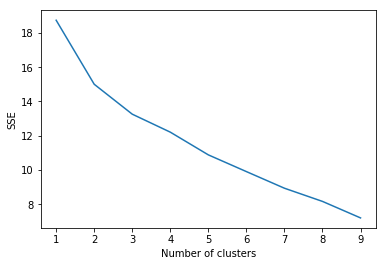

In [55]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

#### Use the optimal k value obtained from the above graph

In [57]:
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 0, 2, 0, 1, 1, 1])

In [58]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
13,Badami,15.923024,75.679630,1,Hotel,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
19,Hampi,15.336226,76.460328,0,Indian Restaurant,Restaurant,Café,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner
31,Hanuman Temple,15.354657,76.469808,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
38,Martanga Hill,15.331547,76.468443,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
45,Hemakuta Hill,15.335066,76.460898,0,Indian Restaurant,Restaurant,Café,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner
54,Wonder La,12.835435,77.401427,0,Indian Restaurant,Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop
58,PVR bluO,13.011198,77.555057,1,Clothing Store,Italian Restaurant,Coffee Shop,French Restaurant,Shopping Mall,Department Store,Gas Station,Hotel,Donut Shop,Motorcycle Shop
84,Rangashankara,12.911472,77.586997,0,Indian Restaurant,Fast Food Restaurant,Seafood Restaurant,Electronics Store,Diner,Coffee Shop,Sandwich Place,Vegetarian / Vegan Restaurant,Café,Snack Place
113,Cubbon Park,12.977042,77.595277,2,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Coffee Shop,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
121,M.G Road Boulevard,12.975771,77.603979,1,Indian Restaurant,Café,Burger Joint,Toy / Game Store,Fried Chicken Joint,Coffee Shop,Clothing Store,Music Store,Pizza Place,American Restaurant


# Visualize Clusters

In [61]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Examine each cluster and determine the businesses that distinguish each cluster.

#### Cluster 1

In [62]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
19,Hampi,Indian Restaurant,Restaurant,Café,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner
31,Hanuman Temple,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
38,Martanga Hill,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
45,Hemakuta Hill,Indian Restaurant,Restaurant,Café,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner
54,Wonder La,Indian Restaurant,Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Coffee Shop,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop
84,Rangashankara,Indian Restaurant,Fast Food Restaurant,Seafood Restaurant,Electronics Store,Diner,Coffee Shop,Sandwich Place,Vegetarian / Vegan Restaurant,Café,Snack Place
148,Mudhumalai Forest,Food Truck,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop
158,nandi hills,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
161,The Druid Garden,Indian Restaurant,Fast Food Restaurant,Electronics Store,Bubble Tea Shop,Pizza Place,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Dry Cleaner,Donut Shop,Diner
177,Richard's Park,Indian Restaurant,Food Truck,BBQ Joint,Bakery,Café,Department Store,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Electronics Store


#### Cluster 2

In [63]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
13,Badami,Hotel,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
58,PVR bluO,Clothing Store,Italian Restaurant,Coffee Shop,French Restaurant,Shopping Mall,Department Store,Gas Station,Hotel,Donut Shop,Motorcycle Shop
121,M.G Road Boulevard,Indian Restaurant,Café,Burger Joint,Toy / Game Store,Fried Chicken Joint,Coffee Shop,Clothing Store,Music Store,Pizza Place,American Restaurant
152,Bandipur National Park,Rest Area,Vegetarian / Vegan Restaurant,Coffee Shop,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
154,Rose Garden,Coffee Shop,Hotel,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
171,Bhartiya City,Garden Center,Pizza Place,Café,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner
193,Gangamma Circle,Diner,Dessert Shop,Italian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Department Store
274,Raja's seat,Asian Restaurant,Indian Restaurant,Department Store,Café,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop
329,Sri Chamarajendra Zoological Gardens - Mysore Zoo,Café,Tea Room,Hotel,Coffee Shop,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop
343,Mysore Zoo,Tea Room,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop


#### Cluster 3

In [64]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
113,Cubbon Park,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Coffee Shop,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
191,Our Native Village,Dry Cleaner,Vegetarian / Vegan Restaurant,Toy / Game Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
217,Mudigere,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Toy / Game Store,Fish & Chips Shop,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop,Department Store
252,Lord Bahubali Temple,Asian Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop
479,Gol Gumbaz,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Toy / Game Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Dry Cleaner,Donut Shop,Diner,Dessert Shop
